# 12 months sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import sys

sys.path

['C:\\Users\\asus\\Documents\\Python_Scripts\\Pandas_cases_practice\\Case_8_12_months_sales',
 'D:\\A\\python38.zip',
 'D:\\A\\DLLs',
 'D:\\A\\lib',
 'D:\\A',
 '',
 'D:\\A\\lib\\site-packages',
 'D:\\A\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'D:\\A\\lib\\site-packages\\win32',
 'D:\\A\\lib\\site-packages\\win32\\lib',
 'D:\\A\\lib\\site-packages\\Pythonwin',
 'D:\\A\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\asus\\.ipython']

> Merging 12 months of salse data into one CSV file 

In [3]:
import os

path = 'C:\\Users\\asus\\Documents\\Python_Scripts\\Pandas_cases_practice\\Case_8_12_months_sales\\'

months = ['January','February','March','April',
          'May','June','July','August',
          'September','October','November','December']

total_months = pd.DataFrame()

for i in months:
    total_months = total_months.append(pd.read_csv(path + 'Exercise_Data_' + str(i) + '.csv'))

In [4]:
total_months.to_csv('12_months_sales.csv',
                    index=False)

> import/read data

In [5]:
df = pd.read_csv('12_months_sales.csv')

## Data Cleaning

### 1. Let's remove rows of NAN = list-wise deletion

In [6]:
nan = df[df.isna().any(axis=1)]

df = df.dropna(how='all')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### 2. Let's look at Order Date column.

In [7]:
#check if there is any string in order date column

order_date = df[df['Order Date'].str[0:2] == 'Or']
order_date

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


- Let's delete these string.


In [8]:
df = df[df['Order Date'].str[0:5] != 'Order']

### 3. Let's look at "Quantity Ordered and Price Each", and convert them into correct type.

In [9]:
# make 'Quantity Ordered' be int.
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

# make 'Price Each' be float
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


### 4. Add some helpful columns, like "month"/"hour"/"city"/''sales''

#### Month

In [11]:
df['Month'] = df['Order Date'].str[0:2]

df['Month'] = df['Month'].astype('int64')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


#### Hour

In [12]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11


#### Minute

In [13]:
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,21,25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14,15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,13,33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,20,33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11,59


#### City

In [14]:
df['Purchase Address'] = df['Purchase Address'].astype('string')

df['Purchase Address']

0                944 Walnut St, Boston, MA 02215
1               185 Maple St, Portland, OR 97035
2          538 Adams St, San Francisco, CA 94016
3             738 10th St, Los Angeles, CA 90001
4                  387 10th St, Austin, TX 73301
                           ...                  
186845    14 Madison St, San Francisco, CA 94016
186846      549 Willow St, Los Angeles, CA 90001
186847          273 Wilson St, Seattle, WA 98101
186848            778 River St, Dallas, TX 75001
186849    747 Chestnut St, Los Angeles, CA 90001
Name: Purchase Address, Length: 185950, dtype: string

In [15]:
df['Purchase Address'][1][1]

'8'

In [16]:
def city(address):
    return address.split(',')[1].strip(' ')

def state(address):
    return address.split(',')[2].split(' ')[1]

In [17]:
df['City'] = df['Purchase Address'].apply(lambda x: f"{city(x)}({state(x)})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,21,25,Boston(MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14,15,Portland(OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,13,33,San Francisco(CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,20,33,Los Angeles(CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11,59,Austin(TX)


#### Sales

In [18]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,City,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,21,25,Boston(MA),700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14,15,Portland(OR),14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,13,33,San Francisco(CA),23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,20,33,Los Angeles(CA),149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11,59,Austin(TX),11.99


In [19]:
month_order = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                    ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                     inplace=True)

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,City,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,21,25,Boston(MA),700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14,15,Portland(OR),14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,13,33,San Francisco(CA),23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,20,33,Los Angeles(CA),149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11,59,Austin(TX),11.99
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec,20,58,San Francisco(CA),14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec,12,1,Los Angeles(CA),7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec,6,43,Seattle(WA),400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec,10,39,Dallas(TX),11.99


## 5. Let's find the best month for sales and plot the result.

In [20]:
df.groupby('Month').sum().sort_values(by='Sales',
                                      ascending=False)

,Quantity Ordered,Price Each,Hour,Minute,Sales
Month,,,,,
Dec,28114,4588415.41,359978,733082,4613443.34
Oct,22703,3715554.83,290650,598437,3736726.88
Apr,20558,3367671.02,262259,544186,3390670.24
Nov,19798,3180600.68,254865,518231,3199603.20
May,18667,3135125.13,238780,487899,3152606.75
Mar,17005,2791207.83,218969,447559,2807100.38
Jul,16072,2632539.56,206169,417349,2647775.76
Jun,15253,2562025.61,195528,402436,2577802.26
Aug,13448,2230345.42,172289,353857,2244467.88


In [21]:
month_sales = df.groupby('Month').sum().sort_values(by='Sales',
                                                  ascending=False).reset_index()
month_sales

,Month,Quantity Ordered,Price Each,Hour,Minute,Sales
0,Dec,28114,4588415.41,359978,733082,4613443.34
1,Oct,22703,3715554.83,290650,598437,3736726.88
2,Apr,20558,3367671.02,262259,544186,3390670.24
3,Nov,19798,3180600.68,254865,518231,3199603.20
4,May,18667,3135125.13,238780,487899,3152606.75
5,Mar,17005,2791207.83,218969,447559,2807100.38
6,Jul,16072,2632539.56,206169,417349,2647775.76
7,Jun,15253,2562025.61,195528,402436,2577802.26
8,Aug,13448,2230345.42,172289,353857,2244467.88
9,Feb,13449,2188884.72,172669,354885,2202022.42


Text(0, 0.5, 'Total Sales')

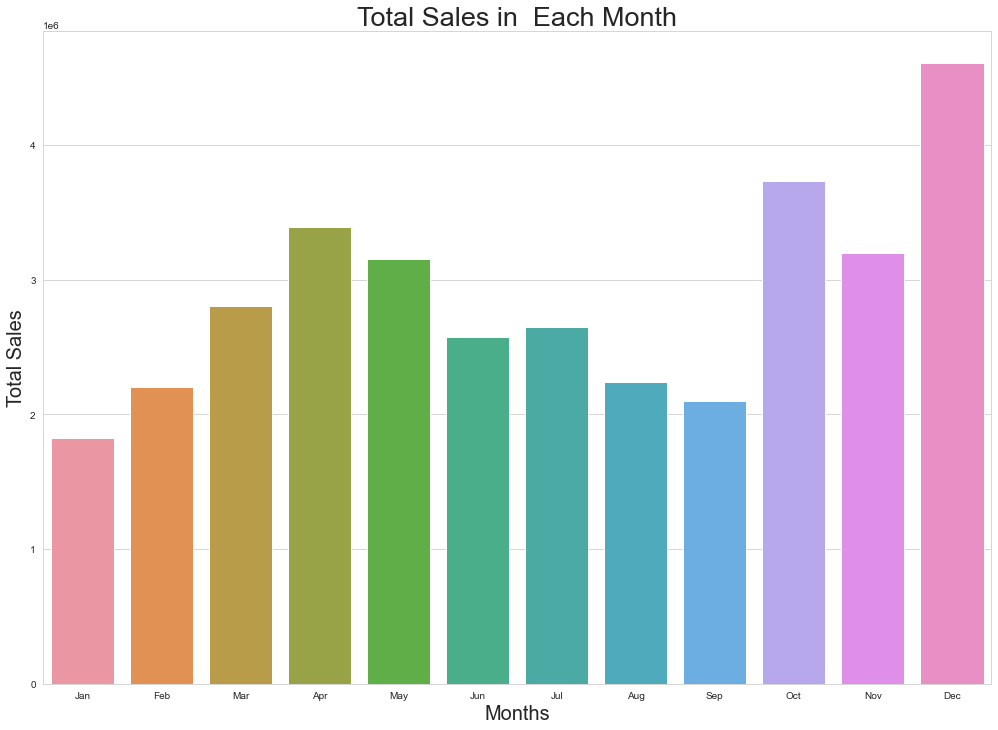

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x='Month',
            y='Sales',
            data=month_sales,
            order=month_order )

plt.title('Total Sales in  Each Month', fontsize=27)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

## 6. Let's find the best sales in hours and plot the result.

In [23]:
df['Hour'].unique()

array([21, 14, 13, 20, 11, 12, 10, 18, 19, 17,  8,  9,  0, 22, 23, 16,  7,
       15,  1,  2,  5,  6,  3,  4], dtype=int64)

In [24]:
hour_sales = pd.DataFrame(df['Hour'].value_counts().reset_index())

hour_sales.columns = ['Sales Time','numbers']

hour_sales = hour_sales.sort_values(by = 'Sales Time')

hour_sales

,Sales Time,numbers
17,0,3910
19,1,2350
21,2,1243
23,3,831
22,4,854
20,5,1321
18,6,2482
16,7,4011
15,8,6256
13,9,8748


Text(0, 0.5, 'Total Sales')

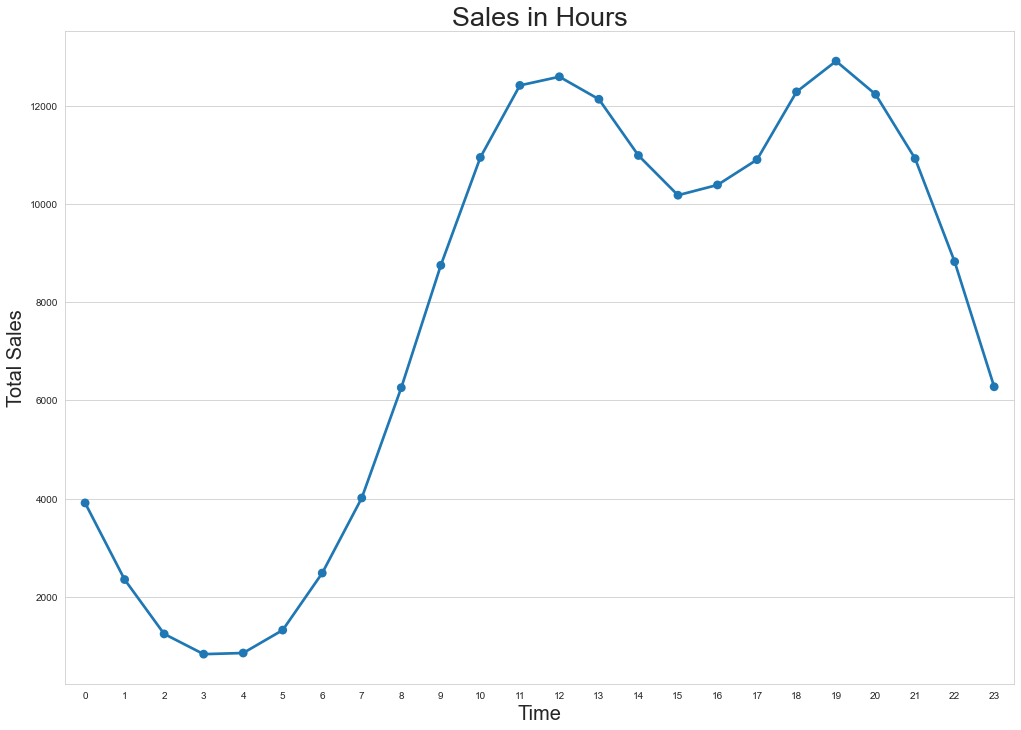

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.pointplot(x='Sales Time',
              y='numbers',
              data=hour_sales)

plt.title('Sales in Hours', fontsize=27)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

#### Another method to plot hourly sales.

Text(0, 0.5, 'Total Sales')

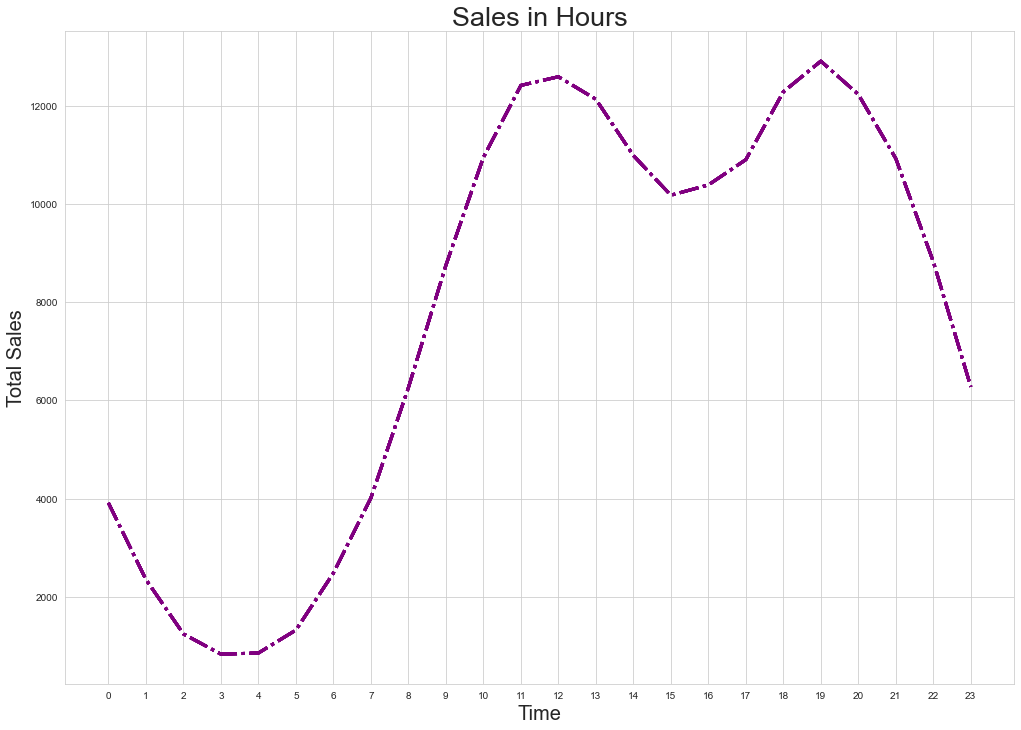

In [26]:
hours = [hour for hour, df in df.groupby(['Hour'])]

plt.figure(figsize=(17,12))
plt.plot(hours, df.groupby(['Hour']).count(),
         lw=3,
         linestyle='-.',
         color='purple')

plt.xticks(hours)

plt.title('Sales in Hours', fontsize=27)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

## 7. Let's find the best sales in cities and plot the result.

In [27]:
city_sales = df.groupby('City').sum().sort_values(by='Sales',
                                                  ascending=False).reset_index()

city_sales

,City,Quantity Ordered,Price Each,Hour,Minute,Sales
0,San Francisco(CA),50239,8211461.74,643265,1319477,8262203.91
1,Los Angeles(CA),33289,5421435.23,427444,866638,5452570.80
2,New York City(NY),27932,4635370.83,357696,733598,4664317.43
3,Boston(MA),22528,3637409.77,288225,590442,3661642.01
4,Atlanta(GA),16602,2779908.20,214264,442932,2795498.58
5,Dallas(TX),16730,2752627.82,214390,435155,2767975.40
6,Seattle(WA),16553,2733296.01,213292,436368,2747755.48
7,Portland(OR),11303,1860558.22,144421,295533,1870732.34
8,Austin(TX),11153,1809873.61,141946,289060,1819581.75
9,Portland(ME),2750,447189.25,35211,72856,449758.27


Text(0, 0.5, 'Total Sales')

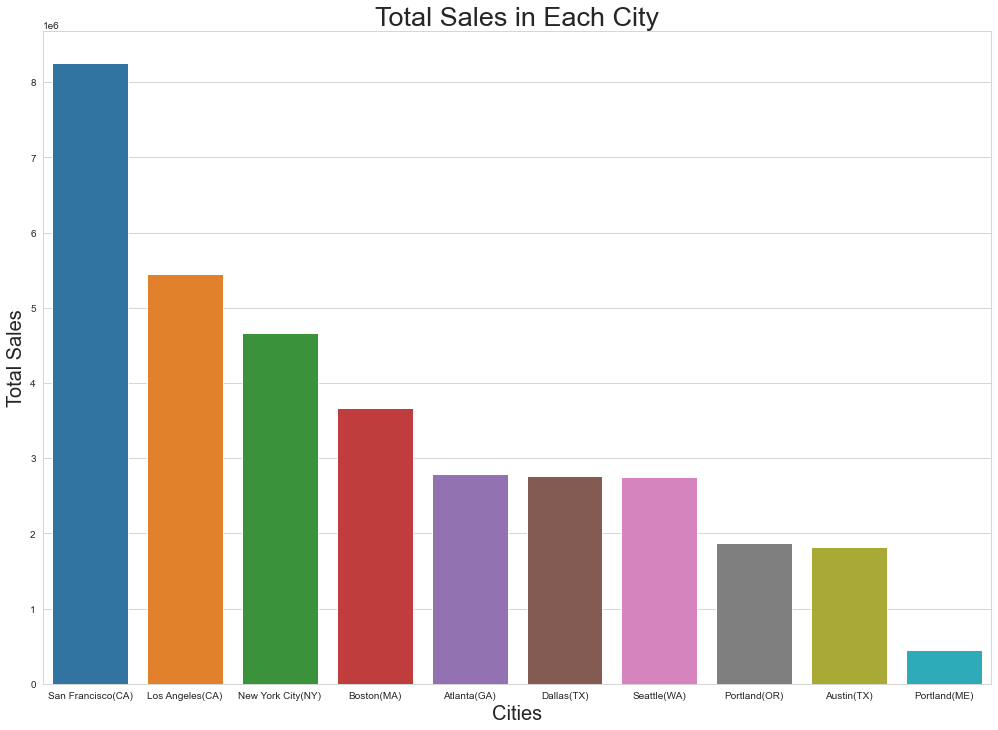

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x='City',
            y='Sales',
            data=city_sales)

plt.title('Total Sales in Each City', fontsize=27)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

## 8. What products are most often sold together？


- Let's find out duplicate values in `Order ID`.


- Then add a new column in order to put these products of same Order ID together. 


- And drop out rows with duplicates Order IDs.

In [29]:
duplicates = df[df['Order ID'].duplicated(keep=False)]

duplicates['Sold Together'] = duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

sold_together = duplicates[['Order ID','Sold Together']].drop_duplicates()

sold_together.head()


<ipython-input-29-ed8cbfcc30ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Sold Together'] = duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Sold Together
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


- Count pairs of products.

In [30]:
from itertools import combinations
from collections import Counter

In [31]:
count = Counter()

for row in sold_together['Sold Together']:
    
    row_list = row.split(',')
    
    count.update(Counter(combinations(row_list, 2)))
    
    
for key, values in count.most_common(10):
    print(key, values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## 9. What products sold the most?


In [32]:
products = df.groupby('Product')

products_rank = pd.DataFrame(products.sum()['Quantity Ordered'].reset_index())

products_rank = products_rank.sort_values(by='Quantity Ordered',
                                          ascending=False)

products_rank

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


Text(0, 0.5, 'Product')

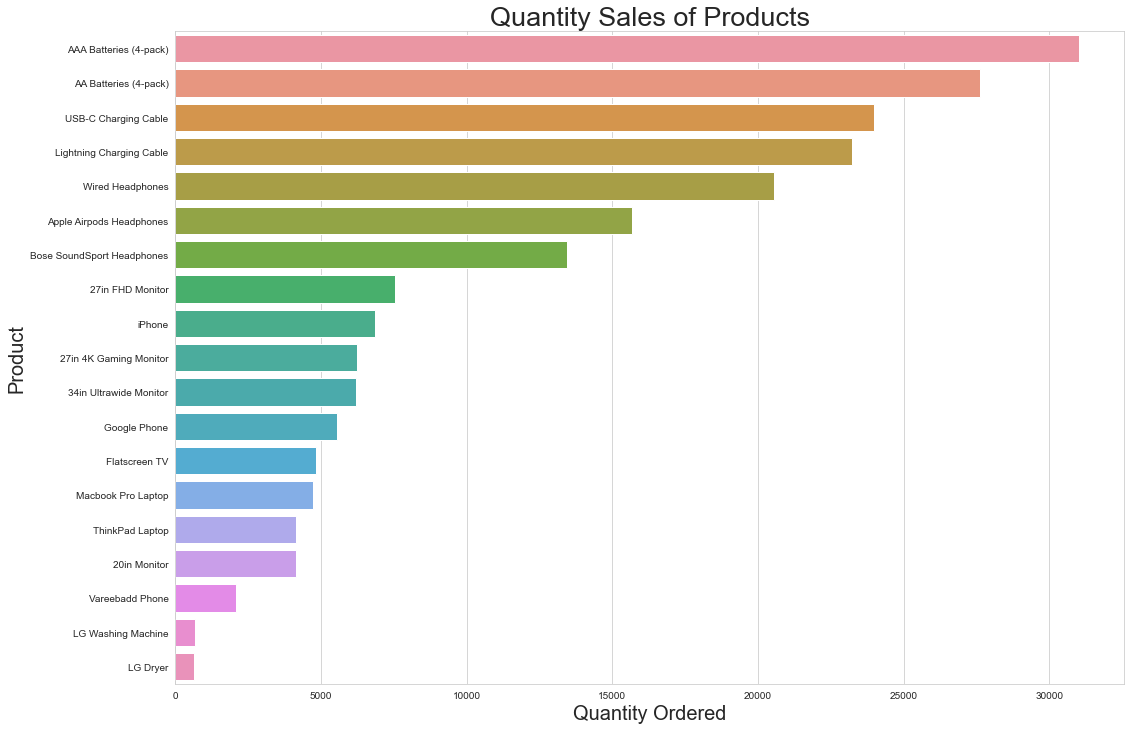

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x='Quantity Ordered',
            y='Product',
            data=products_rank)

plt.title('Quantity Sales of Products', fontsize=27)
plt.xlabel('Quantity Ordered', fontsize=20)
plt.ylabel('Product', fontsize=20)

#### Another method to plot quantity sales of products.

In [34]:
products_ranking = products.sum()['Quantity Ordered']

product = [product for product, df in products]

Text(0, 0.5, 'Quantity Ordered')

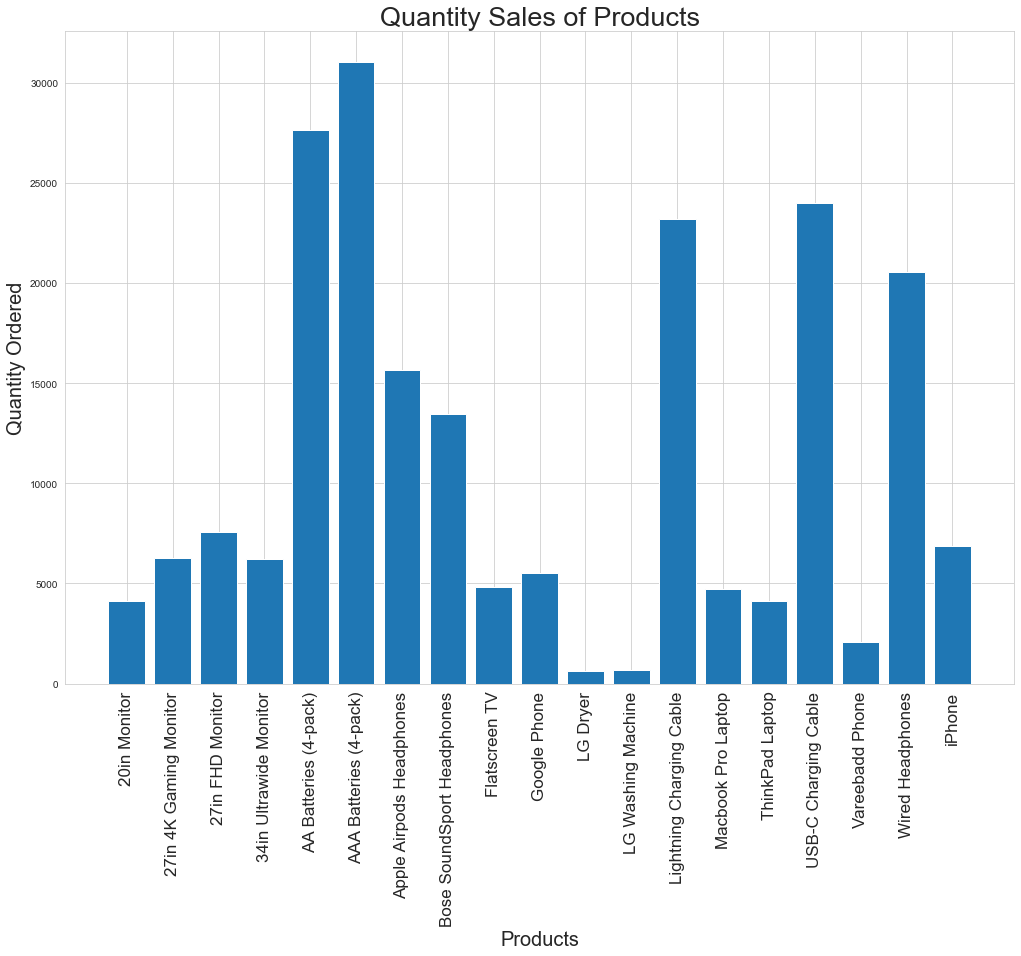

In [35]:
plt.figure(figsize=(17,12))

plt.bar(product, products_ranking)

plt.xticks(product,
           rotation = 'vertical',
           size = 17)

plt.title('Quantity Sales of Products', fontsize=27)
plt.xlabel('Products', fontsize=20)
plt.ylabel('Quantity Ordered', fontsize=20)

#### Overlay a second x-axis on above chart.

In [36]:
prices = df.groupby('Product').mean()['Price Each']

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-37-9171526fb1d0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,


Text(0.5, 1.0, 'Quantity Sales of Products')

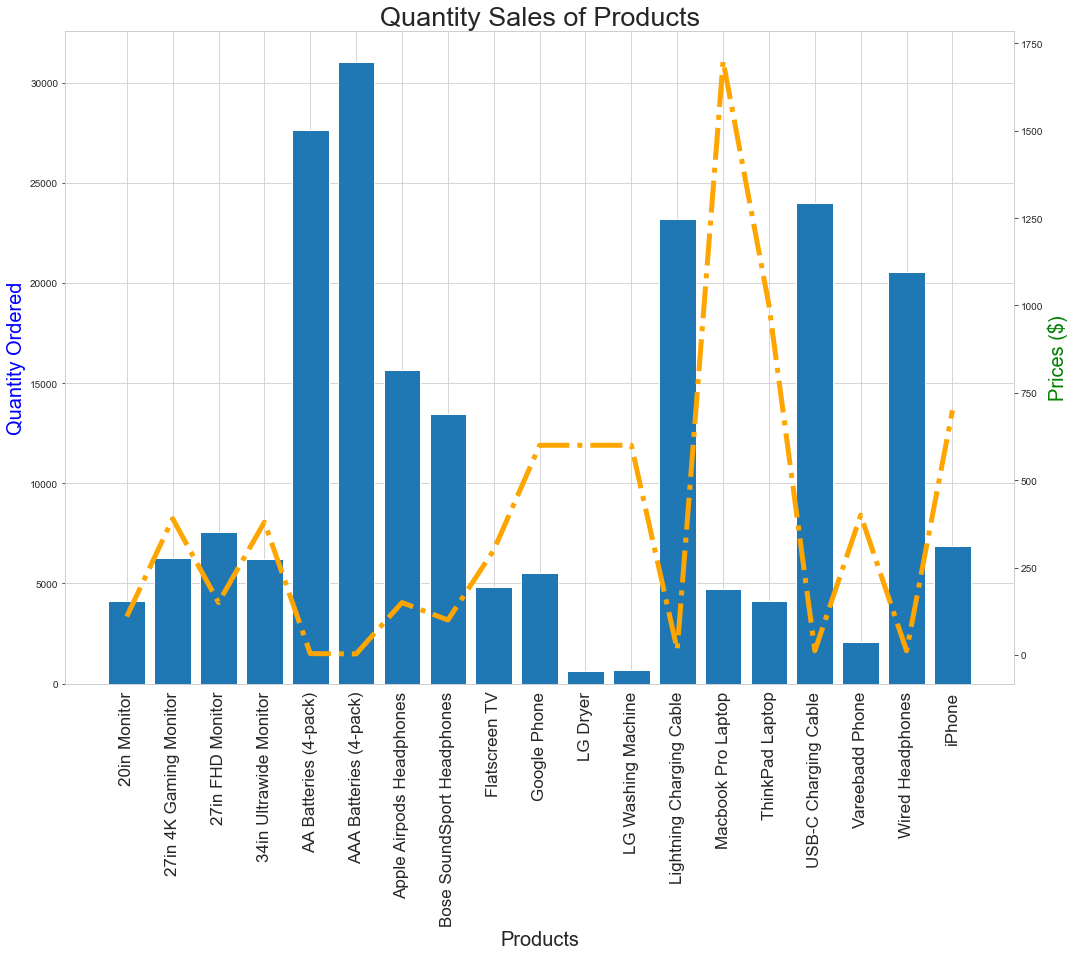

In [37]:
fig,ax1 = plt.subplots(figsize=(17,12))

ax2 = ax1.twinx()

ax1.bar(product, products_ranking)
ax2.plot(product, prices,
         '-.',
         color='orange',
         lw=5)

ax1.set_xlabel('Products', fontsize=20)
ax1.set_ylabel('Quantity Ordered', fontsize=20, color='blue')
ax2.set_ylabel('Prices ($)', fontsize=20, color='green')

ax1.set_xticklabels(product,
                    rotation = 'vertical',
                    size = 17)

plt.grid(False)
plt.title('Quantity Sales of Products', fontsize=27)